<a href="https://colab.research.google.com/github/HimanshuP8983/Deep-Learning/blob/master/BearClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision import *

In [ ]:
folder = 'black'
file = 'urls_black.csv'

In [ ]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)

In [ ]:
path.ls()

[PosixPath('data/bears/black'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/models'),
 PosixPath('data/bears/urls_grizzly.csv'),
 PosixPath('data/bears/urls_black.csv'),
 PosixPath('data/bears/teddys'),
 PosixPath('data/bears/urls_teddy.csv'),
 PosixPath('data/bears/cleaned.csv')]

In [ ]:
download_images(path/file,dest,max_pics=200)

In [ ]:
folder = 'teddys'
file = 'urls_teddy.csv'

In [ ]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)

In [ ]:
download_images(path/file,dest,max_pics=200)

In [ ]:
path.ls()

[PosixPath('data/bears/black'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/models'),
 PosixPath('data/bears/urls_grizzly.csv'),
 PosixPath('data/bears/urls_black.csv'),
 PosixPath('data/bears/teddys'),
 PosixPath('data/bears/urls_teddy.csv'),
 PosixPath('data/bears/cleaned.csv')]

In [ ]:
folder = 'grizzly'
file = 'urls_grizzly.csv'

In [ ]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)

In [ ]:
download_images(path/file,dest,max_pics=200)

In [ ]:
path.ls()

[PosixPath('data/bears/black'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/models'),
 PosixPath('data/bears/urls_grizzly.csv'),
 PosixPath('data/bears/urls_black.csv'),
 PosixPath('data/bears/teddys'),
 PosixPath('data/bears/urls_teddy.csv'),
 PosixPath('data/bears/cleaned.csv')]

In [ ]:
classes = ['teddys','grizzly','black']

In [ ]:
for c in classes:
  print(c)
  verify_images(path/c,delete=True,max_size=750)

teddys


grizzly


black


In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train='.',valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['black', 'grizzly', 'teddys']

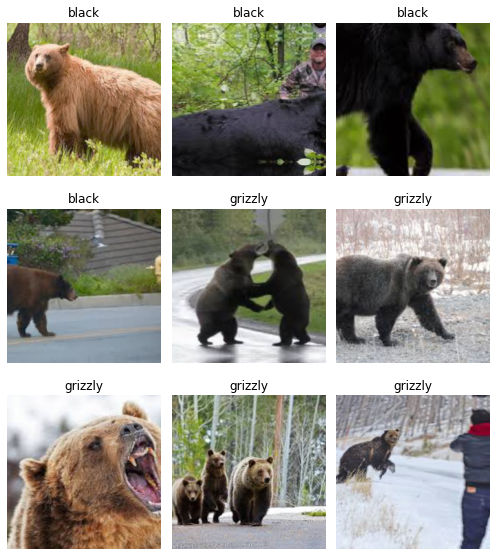

In [ ]:
data.show_batch(rows=3,figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds),len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 384, 96)

In [ ]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.131795,0.164195,0.052083,00:04
1,0.653566,0.062327,0.031250,00:04
2,0.447309,0.055273,0.010417,00:04
3,0.346439,0.049515,0.010417,00:04


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


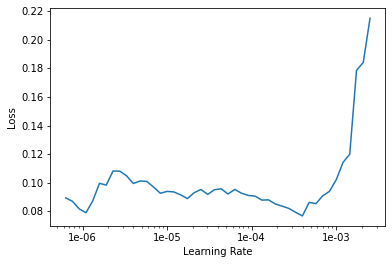

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4,max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.099698,0.044520,0.010417,00:04
1,0.095437,0.058895,0.020833,00:04
2,0.090496,0.007991,0.000000,00:04
3,0.092048,0.008729,0.000000,00:04


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [ ]:
learn.save('stage-2')

In [ ]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (384 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: data/bears;

Valid: LabelList (96 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,teddys,teddys,grizzly,teddys
Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

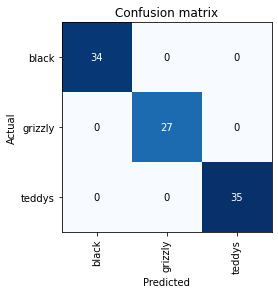

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
from fastai.widgets import *

In [ ]:
db = (ImageList.from_folder(path).split_none().label_from_folder().transform(get_transforms(),size=224).databunch())

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [ ]:
learn_cln = cnn_learner(db,models.resnet34,metrics=error_rate)
learn_cln.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (480 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: data/bears;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

In [ ]:
ds,idxs = DatasetFormatter().from_toplosses(learn_cln)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [ ]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


Computing similarities...


In [ ]:
learn.export()

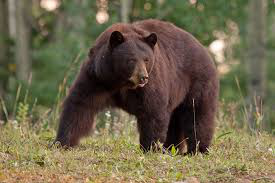

In [ ]:
img = open_image(path/'black'/'00000000.jpg')
img

In [ ]:
learn = load_learner(path)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)

In [ ]:
pred_class.obj

'black'

In [ ]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)

In [ ]:
learn.fit_one_cycle(1,max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,22.787964,43400432.000000,0.718750,00:04


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u